# Übung 2 - Fixpunktiteration in Python

**Banach'scher Fixpunktsatz in \\(\mathbb{R}\\):** Sei \\(I=[a,b] \subset \mathbb{R}\\) ein kompaktes Intervall und \\(f: I \rightarrow \mathbb{R}\\) eine kontrahierende Selbstabbildung auf \\(I\\) mit Kontraktionskonstante \\(L<1\\). Dann gilt:

1. \\(f\\) besitzt in \\(I\\) genau einen Fixpunkt \\(\xi\\).
2. Das Iterationsverfahren 
    \\[ (IV) \ \begin{cases} x_0 \in I \\ x_{k+1} = f(x_k), \ k=0,1,... \end{cases} \\]
    konvergiert für jeden Startwert \\(x_0\in I\\) gegen den Fixpunkt \\(\xi\\).
3. Für \\(k\in\mathbb{N}\\) gilt die a-priori-Abschätzung

\\[ |x_k-\xi| \leq \frac{L^k}{1-L} |x_1-x_0| \\]

4. Für \\(k\in\mathbb{N}\\) gilt die a-posteriori-Abschätzung

\\[ |x_k-\xi| \leq \frac{L}{1-L} |x_k-x_{k-1}| \\]
***

**Beispiel:** Betrachtet wird die Funktion \\( f \\) mit

\\[ f(x)=\frac{1}{5} e^{sin(3x)} + \frac{1}{3} \ \text{ für } \ x\in[-1,1]. \\]

Mithilfe von Python werden wir zunächst überprüfen, dass die Funktion \\(f\\) die Voraussetzungen des Fixpunktsatzes von Banach erfüllt. Anschließend wollen wir mit der Fixpunktiteration in Python den Fixpunkt von \\(f\\) approximieren.

**Hinweis:** Die Voraussetzungen des Fixpunktsatzes werden wir an Plots der nötigen Funktionen ablesen. Dabei handelt es sich natürlich nicht um einen mathematischen Beweis!  Die Erkenntnisse, die wir im Laufe des Notebooks gewinnen werden, lassen sich auch analytisch überprüfen. Hier steht allerdings das Programmieren mit Python und das Verständis des Fixpunktsatzes im Vordergrund.

**a)** Schreiben Sie eine Prozedur, die zu einem x-Wert den passenden Funktionswert von \\(f\\) liefert.

In [1]:
import numpy as np

def f(x):
    return 1/5*np.exp(np.sin(3*x))+1/3

In [2]:
f(1/3)

0.797288698276504

***
**b)** Plotten Sie die Funktion \\(f\\) und überprüfen Sie anhand des Plots, ob es sich um eine Selbstabbildung handelt.

**Hinweis:** Über `plt.title('gewünschter Text')` können Sie dem Plot eine Überschrift vergeben.

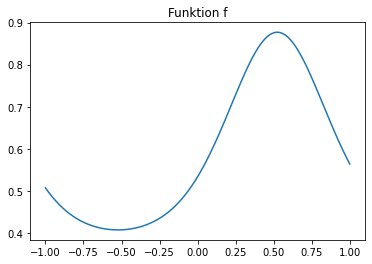

In [3]:
import matplotlib.pyplot as plt

x_points = np.arange(-1,1.001,0.001)
f_values = f(x_points)
plt.plot(x_points,f_values)
plt.title('Funktion f')
plt.show()


**Ergebnis:** Der Plot zeigt, dass sich die Funktionswerte von \\(f\\) zwischen 0.4 und 0.9 bewegen. Da \\([0.4,0.9]\subset [-1,1]\\) gilt, ist \\(f\\) eine Selbstabbildung.

***
Als nächstes wollen wir herausfinden, ob \\(f\\) auch kontrahierend ist. Für stetig differenzierbare Funktionen \\(f\\) mit Definitionsbereich \\(I\\) und für Zahlen \\(L<1\\) gilt nach Bemerkung 2.4 aus der Vorlesung:
> \\(f\\) ist Kontraktion mit Kontraktionskonstante \\(L\\)   \\(\  \Longleftrightarrow \  \\)   \\(\max_{x\in I} |f'(x)|\leq L \ \\) (Der Betrag der Ableitung von \\(f\\) ist durch \\(L\\) beschränkt).
***
Die Funktion \\(f\\) von oben ist tatsächlich stetig differenzierbar, es gilt

\\[ f'(x) = \frac{3}{5} cos(3x) e^{sin(3x)} \\]

***
**c)** Schreiben Sie auch für \\(f'\\) eine Prozedur, die zu einem x-Wert den passenden Wert von \\(f'\\) liefert. Plotten Sie anschließend die Funktion \\(f'\\) und überprüfen Sie anhand des Plots, ob es sich bei der Funktion \\(f\\) um eine Kontraktion handelt.

**Hinweis:** 
* Durch den Befehl `plt.grid()` können Sie einem Plot ein Gitter im Hintergrund hinzufügen, das Ihnen das Ablesen von Funktionswerten erleichtert. 
* Durch die Befehle `plt.xlim(a,b)` und `plt.ylim(c,d)` können Sie den im Plot dargestellten Abschnitt der x-Achse und der y-Achse auf das Intervall \\([a,b]\\) bzw. \\([c,d]\\) ändern. 

Verwenden Sie diese Befehle, um den betragsmäßig maximalen Wert der Ableitung genauer ablesen zu können.

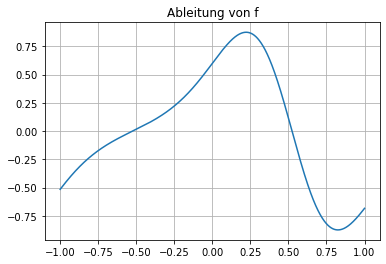

In [4]:
def f_prime(x):
    return 3/5*np.cos(3*x)*np.exp(np.sin(3*x))

x_points = np.arange(-1,1.001,0.001)
f_prime_values = f_prime(x_points)
plt.plot(x_points,f_prime_values)
plt.grid()
plt.title('Ableitung von f')
plt.show()

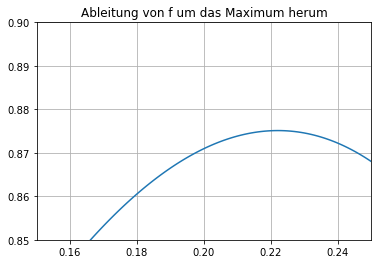

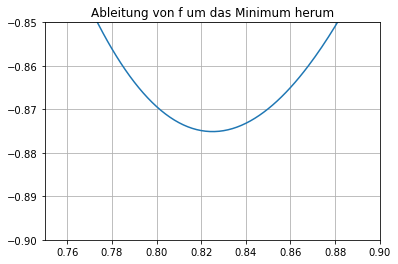

In [5]:
plt.plot(x_points,f_prime_values)
plt.xlim(0.15,0.25)
plt.ylim(0.85,0.9)
plt.grid()
plt.title('Ableitung von f um das Maximum herum')
plt.show()

plt.plot(x_points,f_prime_values)
plt.xlim(0.75,0.9)
plt.ylim(-0.9,-0.85)
plt.grid()
plt.title('Ableitung von f um das Minimum herum')
plt.show()

**Ergebnis:** Die Ableitung von \\(f\\) wird nicht größer als \\(0.88\\) und nicht kleiner als \\(-0.88\\). Insbesondere ist der Betrag der Ableitung durch die Zahl \\(0.88\\) beschränkt. Es handelt sich bei \\(f\\) also um eine Kontraktion mit Kontraktionskonstante \\(L=0.88\\).

***
**d)** Schreiben Sie eine Prozedur, die für eine Funktion \\(f\\) mit Kontraktionskonstante \\(L\\) und für einen Startwert \\(x_0\\) die Fixpunktiteration durchführt. Dabei soll die Iteration so lange durchgeführt werden, bis der Abstand der Iterierten zum tatsächlichen Fixpunkt maximal 0.001 beträgt. Verwenden Sie dazu die a posteriori Fehlerabschätzung aus dem Banach'schen Fixpunktsatz. Die Prozedur soll alle berechneten Iterierten auf dem Bildschirm ausgeben und die finale Approximation an den Fixpunkt sowie die Anzahl an berechneten Schritten zurückgeben.

In [6]:
def fixpunkt_iteration(f,L,x_0):
    x_old = x_0
    x_new = f(x_old)
    k=1
    print(k,'-te Itrerierte:',x_new)
    
    while L/(1-L)*abs(x_new-x_old) > 0.001:
        x_old = x_new
        x_new = f(x_new)
        k=k+1
        print(k,'-te Itrerierte:',x_new)

    return x_new , k

***
**e)** Berechnen Sie, bevor Sie die Prozedur tatsächlich ausführen, wie viele Schritte Ihre Prozedur maximal brauchen wird, um den Fixpunkt ausgehend von dem Startwert \\(x_0=-0.5\\) bis auf eine Genauigkeit von 0.001 auszurechnen.

**Lösung:** Nach der a priori Fehlerabschätzung gilt für den Fixpunkt \\(\xi\\) und die Iterierten \\(x_k\\) der Fixpunktiteration

\\[ |x_k-\xi| \leq \frac{L^k}{1-L}|x_1-x_0| \\]

Um garantieren zu können, dass der Abstand zum Fixpunkt kleiner als 0.001 ist, fordern wir also, dass die rechte Seite der Ungleichung kleiner als 0.001 ist:

\\[ \frac{L^k}{1-L}|x_1-x_0| < 0.001. \\]

Diese Ungleichung lösen wir nach \\(k\\) auf (beachte: Es ist \\(L<1\\) und somit \\(1-L>0\\). Außerdem ist der Logarithmus streng monoton wachsend.):

\\[ \frac{L^k}{1-L}|x_1-x_0| < 0.001 \ \Leftrightarrow \ L^k < \frac{0.001}{|x_1-x_0|} \cdot (1-L) \ \Leftrightarrow \ k\cdot \log(L) < \log\left( \frac{0.001}{|x_1-x_0|} \cdot (1-L) \right). \\]

Wegen \\(L<1\\) und somit \\(\log(L)<0\\) ist dies äquivalent zu

\\[ k > \frac{\log\left( \frac{0.001}{|x_1-x_0|} \cdot (1-L) \right)}{\log(L)} \\]

Wir setzen \\(L=0.88, x_0=-0.5\\) und \\(x_1=f(x_0)\\) ein und lassen Python das Ergebnis berechnen:

In [7]:
L = 0.88
x_0 = -0.5 
np.log( 0.001 / abs(f(x_0) - (x_0)) * (1-L) ) / np.log(L)

69.86054776281776

**Ergebnis:** Die Iteration braucht nicht mehr als 70 Schritte, um den Fixpunkt bis auf eine Genauigkeit von 0.001 zu berechnen.

***
**f)** Führen Sie die Prozedur mit der obigen Funktion \\(f\\), mit der Kontraktionskonstante \\(L=0.88\\) aus Teil c) sowie mit dem Startwert \\(x_0=-0.5\\) aus. Vergleichen Sie die benötigte Anzahl an Schritten mit der Prognose aus Teil e).

In [8]:
x_fix , k = fixpunkt_iteration(f,0.88,-0.5)

1 -te Itrerierte: 0.40709376119388496
2 -te Itrerierte: 0.8450935863493931
3 -te Itrerierte: 0.6869303837231504
4 -te Itrerierte: 0.8166406225569005
5 -te Itrerierte: 0.7118053911557558
6 -te Itrerierte: 0.798832099445743
7 -te Itrerierte: 0.7273369164403685
8 -te Itrerierte: 0.7869575220102278
9 -te Itrerierte: 0.7376136632897082
10 -te Itrerierte: 0.7788302764413941
11 -te Itrerierte: 0.7445904394957792
12 -te Itrerierte: 0.7732045907224099
13 -te Itrerierte: 0.7493859766520998
14 -te Itrerierte: 0.7692915400094203
15 -te Itrerierte: 0.752703021724481
16 -te Itrerierte: 0.7665643609099952
17 -te Itrerierte: 0.7550050274450523
18 -te Itrerierte: 0.7646623296685349
19 -te Itrerierte: 0.7566055027669716
20 -te Itrerierte: 0.7633355668910877
21 -te Itrerierte: 0.7577193800874085
22 -te Itrerierte: 0.7624101230984026
23 -te Itrerierte: 0.7584950678879815
24 -te Itrerierte: 0.7617646767320365
25 -te Itrerierte: 0.7590354422795281
26 -te Itrerierte: 0.7613145638585582
27 -te Itrerierte: 0.7

In [9]:
x_fix

0.7603358880065044

***
**g)** Überprüfen Sie Ihr Ergebnis, indem Sie die Funktion \\(f\\), die erste Winkelhalbierende sowie den gefundenen Fixpunkt in einen gemeinsamen Plot einzeichnen

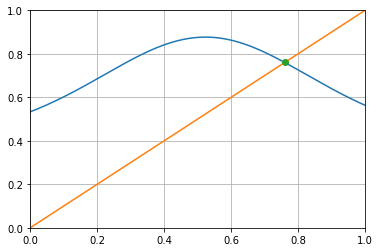

In [10]:
plt.plot(x_points,f_values)
plt.plot(x_points,x_points)
plt.plot(x_fix,f(x_fix),'o')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.show()